In [1]:
model_file = "../models/europe.json"
data_dir   = "data/TOPF_run"

"data/TOPF_run"

In [3]:
using TemperateOptimalPowerFlow
using DataDrop, Plots

# Test setup

Make a temporary copy of the run directory:

In [2]:
test_dir = "data/TOPF_test"

if isdir(test_dir)
    rm(test_dir, recursive=true)
end

mkdir(test_dir)

for file in readdir(data_dir)
    cp("$(data_dir)/$file", "$(test_dir)/$file")
end

# Small-scale test

Reduce the number of times steps:

In [4]:
scale_down(test_dir, 12)

[2024-07-22 14:16:20]  Scaling down file 'data/TOPF_test/P_total.h5' from 8736 to 12 time steps
[2024-07-22 14:16:20]  Scaling down file 'data/TOPF_test/linear_line_cost.h5' from 8736 to 12 time steps
[2024-07-22 14:16:20]  Scaling down file 'data/TOPF_test/linear_gen_cost.h5' from 8736 to 12 time steps
[2024-07-22 14:16:21]  Scaling down file 'data/TOPF_test/P_load.h5' from 8736 to 12 time steps
[2024-07-22 14:16:21]  Scaling down file 'data/TOPF_test/P_nondispatch.h5' from 8736 to 12 time steps


Perform OPF:

In [5]:
using Ipopt
# using Gurobi

In [6]:
compute(test_dir, "P_result_12_1")

[2024-07-22 14:16:23]  OPF with 12 time steps, 771 generators, and 159 ramp constraints (cyclic)
[2024-07-22 14:16:23]   -> checking model
[2024-07-22 14:16:23]   -> defining variables
[2024-07-22 14:16:23]   -> defining constraints
[2024-07-22 14:16:23]   -> computing objective function
[2024-07-22 14:16:23]   -> optimizing

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

[2024-07-22 14:18:56]   -> exporting results
[2024-07-22 14:18:56]  Saving results to file 'data/TOPF_test/P_result_12_1.h5'


The resulting power at each generator for each time step can be obtained with
(note that this includes the non-dispatchable generators as well):

In [7]:
gen = retrieve_gen_results(test_dir, "P_result_12_1")

815×12 Matrix{Float64}:
  1.14         1.14          1.09489     …  0.923998     1.05982
  0.582192     0.422361      0.412801       0.103634     0.480993
  0.454037     0.447876      0.396421       0.338922     0.394108
  0.394643     0.316831      0.27105        0.16748      0.343961
  2.68001      2.60456       2.5972         2.38367      2.44341
  1.56696      1.60622       1.15692     …  1.41868      1.34584
  2.48297      2.38251       2.4807         2.17119      2.48997
  1.18566      0.833157      0.73809        0.75222      0.919925
  0.351732     0.406355      0.345377       0.306765     0.578316
  0.615469     0.600472      0.486511       0.513655     0.469544
  6.78195e-8   0.0054376     0.275615    …  0.032026     0.24005
  0.637848     0.566357      0.337684       0.559926     0.917325
  0.517026     0.670165      0.659712       0.34975      0.236784
  ⋮                                      ⋱  ⋮           
  0.518449     0.383091      0.221599       0.348103     0.341719


Examine the power injections at every bus and verify that they add up to zero at every time step:

In [8]:
injections = retrieve_injections(test_dir, "P_result_12_1")
sum(injections, dims=1)

1×12 Matrix{Float64}:
 -7.38964e-13  0.0  -1.36424e-12  1.7053e-13  …  1.13687e-13  7.38964e-13

The power flowing through the lines can be obtained with:

In [9]:
retrieve_line_flows(test_dir, "P_result_12_1")

8375×12 Matrix{Float64}:
  -0.115611   -0.111343    -0.116947   …   -0.0357047     -0.0549113
  -0.115611   -0.111343    -0.116947       -0.0357047     -0.0549113
   1.39972     1.45372      1.40095         1.56367        1.44296
   1.39972     1.45372      1.40095         1.56367        1.44296
  -1.65871    -1.61611     -1.65691        -1.7368        -1.71488
   0.463397    0.414018     0.432744   …    0.488659       0.458231
   1.15897     1.16203      1.18826         1.21479        1.22387
  -0.322496   -0.46195     -0.465875       -0.481127      -0.4217
   2.847       2.69416      2.73271         2.57808        2.65313
  -0.291069   -0.387043    -0.410458       -0.429309      -0.368145
  -0.291069   -0.387043    -0.410458   …   -0.429309      -0.368145
   0.704729    0.754247     0.761541        0.781236       0.769292
   0.211186    0.0782874    0.0261162      -9.26682e-10    0.0939595
   ⋮                                   ⋱    ⋮            
   2.41182     2.34193      2.22946  

### Compare different partitioning

In [11]:
compute(test_dir, "P_result_3x4_1", [3, 4])

[2024-07-22 14:19:01]  Partitioning a dataset of 12 time steps into 3 chunks of 4 time steps
[2024-07-22 14:19:01]  0/3 OPF with 3 time steps, 771 generators, and 159 ramp constraints (cyclic)
[2024-07-22 14:19:01]       -> checking model
[2024-07-22 14:19:01]       -> defining variables
[2024-07-22 14:19:01]       -> defining constraints
[2024-07-22 14:19:01]       -> computing objective function
[2024-07-22 14:19:01]       -> optimizing
[2024-07-22 14:19:04]       -> exporting results
[2024-07-22 14:19:05]  1/3 OPF with 4 time steps, 771 generators, and 159 ramp constraints (fixed boundaries)
[2024-07-22 14:19:05]       -> checking model
[2024-07-22 14:19:05]       -> defining variables
[2024-07-22 14:19:05]       -> defining constraints
[2024-07-22 14:19:05]       -> computing objective function
[2024-07-22 14:19:05]       -> optimizing
[2024-07-22 14:19:12]       -> exporting results
[2024-07-22 14:19:13]  Estimated remaining time: 16 s
[2024-07-22 14:19:13]  2/3 OPF with 4 time st

In [12]:
compute(test_dir, "P_result_2x2x3_1", [2, 2, 3])

[2024-07-22 14:19:27]  Partitioning a dataset of 12 time steps into 2 chunks of 6 time steps
[2024-07-22 14:19:27]  0/2 OPF with 2 time steps, 771 generators, and 159 ramp constraints (cyclic)
[2024-07-22 14:19:27]       -> checking model
[2024-07-22 14:19:27]       -> defining variables
[2024-07-22 14:19:27]       -> defining constraints
[2024-07-22 14:19:27]       -> computing objective function
[2024-07-22 14:19:27]       -> optimizing
[2024-07-22 14:19:29]       -> exporting results
[2024-07-22 14:19:29]  1/2 Partitioning a dataset of 6 time steps into 2 chunks of 3 time steps
[2024-07-22 14:19:29]  1/2 0/2 OPF with 2 time steps, 771 generators, and 159 ramp constraints (fixed boundaries)
[2024-07-22 14:19:29]           -> checking model
[2024-07-22 14:19:29]           -> defining variables
[2024-07-22 14:19:29]           -> defining constraints
[2024-07-22 14:19:29]           -> computing objective function
[2024-07-22 14:19:29]           -> optimizing
[2024-07-22 14:19:31]       

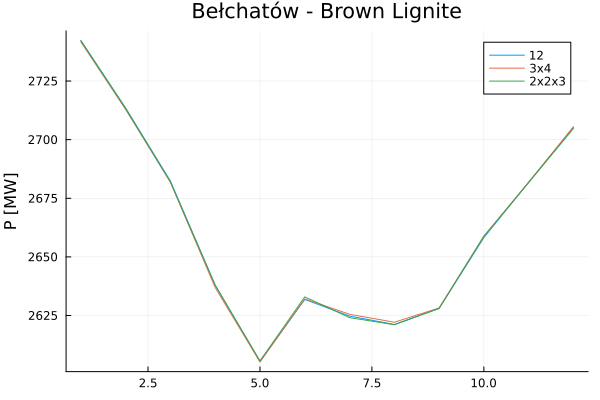

In [13]:
gen_id = 263
gen_name = "Bełchatów - Brown Lignite"

plot()
for partition ∈ ["12", "3x4", "2x2x3"]
    P = DataDrop.retrieve_matrix("$(test_dir)/P_result_$(partition)_1.h5")
    plot!(100 * P[gen_id, :], label=partition, title=gen_name)
end
ylabel!("P [MW]")
# ylims!(0, 3000)

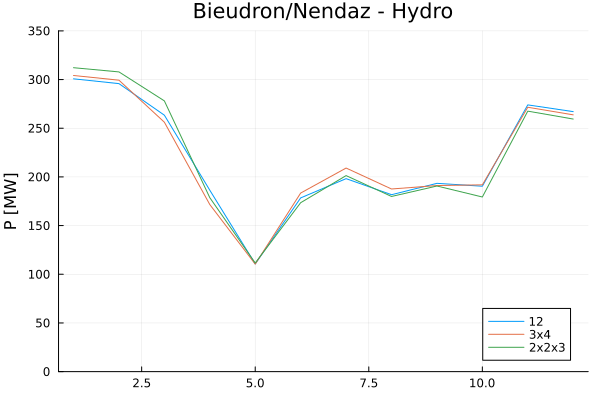

In [14]:
gen_id = 680
gen_name = "Bieudron/Nendaz - Hydro"

plot()
for partition ∈ ["12", "3x4", "2x2x3"]
    P = DataDrop.retrieve_matrix("$(test_dir)/P_result_$(partition)_1.h5")
    plot!(100 * P[gen_id, :], label=partition, title=gen_name)
end
ylabel!("P [MW]")
ylims!(0, 350)

### Compare different noise factors

In [15]:
compute(test_dir, "P_result_12_0", [12], 0)

[2024-07-22 14:19:51]  OPF with 12 time steps, 771 generators, and 159 ramp constraints (cyclic)
[2024-07-22 14:19:51]   -> checking model
[2024-07-22 14:19:51]   -> defining variables
[2024-07-22 14:19:51]   -> defining constraints
[2024-07-22 14:19:51]   -> computing objective function
[2024-07-22 14:19:51]   -> optimizing
[2024-07-22 14:22:29]   -> exporting results
[2024-07-22 14:22:29]  Saving results to file 'data/TOPF_test/P_result_12_0.h5'


In [16]:
compute(test_dir, "P_result_12_10", [12], 10)

[2024-07-22 14:22:29]  OPF with 12 time steps, 771 generators, and 159 ramp constraints (cyclic)
[2024-07-22 14:22:29]   -> checking model
[2024-07-22 14:22:29]   -> defining variables
[2024-07-22 14:22:29]   -> defining constraints
[2024-07-22 14:22:29]   -> computing objective function
[2024-07-22 14:22:29]   -> optimizing
[2024-07-22 14:25:17]   -> exporting results
[2024-07-22 14:25:17]  Saving results to file 'data/TOPF_test/P_result_12_10.h5'


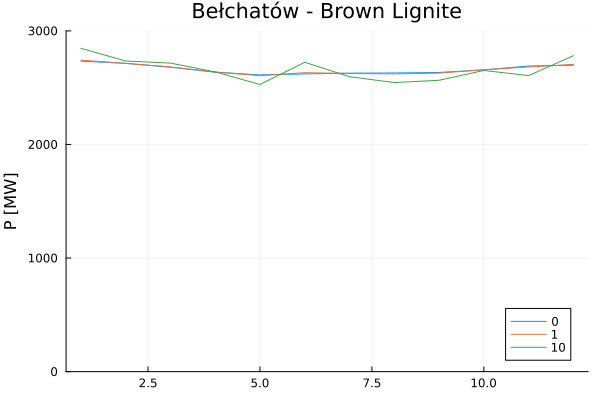

In [17]:
gen_id = 263
gen_name = "Bełchatów - Brown Lignite"

plot()
for noise ∈ ["0", "1", "10"]
    P = DataDrop.retrieve_matrix("$(test_dir)/P_result_12_$noise.h5")
    plot!(100 * P[gen_id, :], label=noise, title=gen_name)
end
ylabel!("P [MW]")
ylims!(0, 3000)

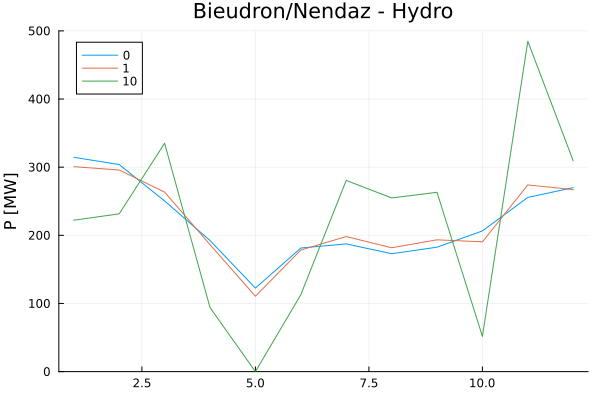

In [18]:
gen_id = 680
gen_name = "Bieudron/Nendaz - Hydro"

plot()
for noise ∈ ["0", "1", "10"]
    P = DataDrop.retrieve_matrix("$(test_dir)/P_result_12_$noise.h5")
    plot!(100 * P[gen_id, :], label=noise, title=gen_name)
end
ylabel!("P [MW]")
ylims!(0, 500)